In [1]:
# import all libraries

import pandas as pd
import numpy as np


# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")   

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

# For time stamps
from datetime import datetime

from scipy.stats import norm, skew #for some statistics
from scipy import stats #qqplot
import statsmodels.api as sm #for decomposing the trends, seasonality etc.

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import statsmodels.graphics.tsaplots as sgt
from sklearn.preprocessing import StandardScaler
# ARMA
from statsmodels.tsa.arima_model import ARMA
# ARIMA
from statsmodels.tsa.arima.model import ARIMA


import pmdarima as pm
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score


In [2]:
# read train test 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
data= train.copy()


In [4]:
data.shape

(300, 6)

<AxesSubplot:>

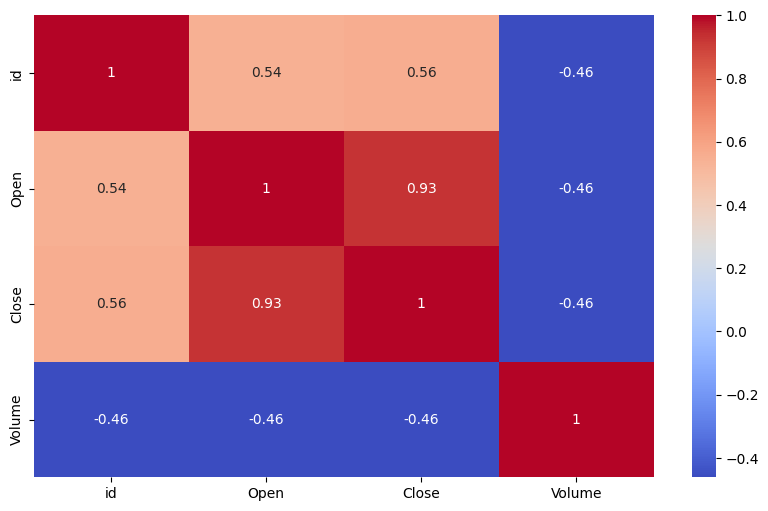

In [5]:
corr = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [6]:
def smape_kun(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def temporal_metrics(y_pred,y_true):
    print("Mean Absolute Error: ",mean_absolute_error(y_true,y_pred))
    print("Mean Squared Error: ",mean_squared_error(y_true,y_pred))
    print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_true,y_pred)))
    print("Smape", smape_kun(y_true,y_pred))

def regression_metrics(y_pred,y_true):
    print("Mean Absolute Error: ",mean_absolute_error(y_true,y_pred))
    print("Mean Squared Error: ",mean_squared_error(y_true,y_pred))
    print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_true,y_pred)))
    print("R2 Score: ",r2_score(y_true,y_pred))

def classification_metrics(y_pred,y_true):
    print("Accuracy: ",accuracy_score(y_true,y_pred))
    print("Precision: ",precision_score(y_true,y_pred, average='macro'))
    print("Recall: ",recall_score(y_true,y_pred, average='macro'))
    print("F1 Score: ",f1_score(y_true,y_pred, average='macro'))
    print("Confusion Matrix: \n",confusion_matrix(y_true,y_pred))

def train_ARIMA(data,order):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    aic = model_fit.aic
    return aic


def find_best_pdq(p_val,d_val,q_val,data):
        
    # Define the range of values for p, d, and q
    p_values = range(0, p_val)  # Replace with an appropriate range
    d_values = range(0, d_val)  # Replace with an appropriate range
    q_values = range(0, q_val)  # Replace with an appropriate range

    # Initialize variables to store best model and criterion value
    best_aic = float("inf")
    best_order=[0,0,0]

    # Perform a grid search to find the best ARIMA model
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = [p, d, q]
                try:
                    aic = train_ARIMA(data,order)
                    if aic < best_aic:
                        best_aic = aic
                        best_order = order
                except:
                    print(p,d,q)
                    continue

    # Print the best model and order
    print("Best AIC: {:.2f}".format(best_aic))
    print("Best ARIMA Order (p, d, q):", best_order)
    return best_order

    



# test train split

In [7]:
X=np.array(data.index).reshape(-1,1)
Y=data['Close']

train_size = int(0.8 * len(data))  # Adjust the split ratio as needed

# Split the data into training and testing sets based on the cutoff index
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = Y[:train_size], Y[train_size:]

# print shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 1)
(60, 1)
(240,)
(60,)


# Arima

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# 20,0,15

arima_model = ARIMA(y_train, order=(20,0,7))
# p,d,q
arima_model_fit = arima_model.fit()

c:\Users\shrey\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
forecast= arima_model_fit.forecast(steps=len(y_test))

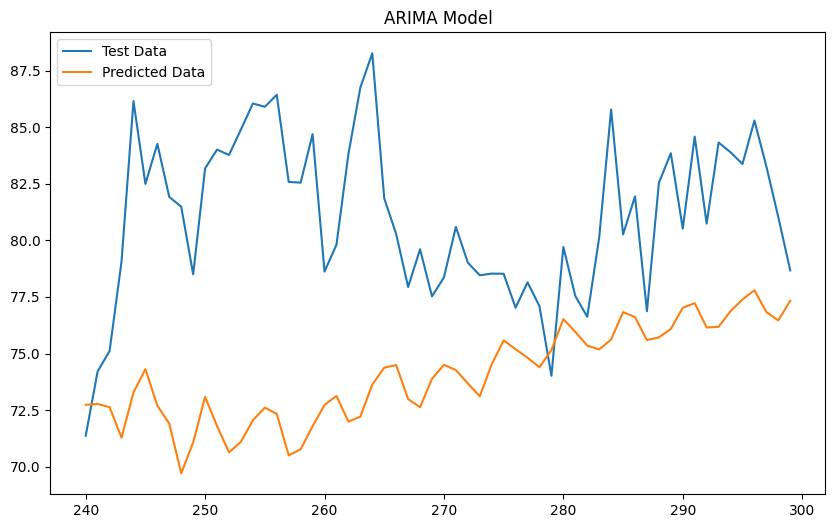

In [10]:
# plot 

plt.figure(figsize=(10,6))
plt.plot(y_test)

plt.plot(forecast)

plt.legend(['Test Data','Predicted Data'], loc='upper left')
plt.title('ARIMA Model')

plt.show()

In [11]:
print(arima_model_fit.aic)
temporal_metrics(forecast,y_test)

1277.205693713053
Mean Absolute Error:  7.062373240168211
Mean Squared Error:  66.63397150341133
Root Mean Squared Error:  8.162963402062472
Smape 0.04523199097608863


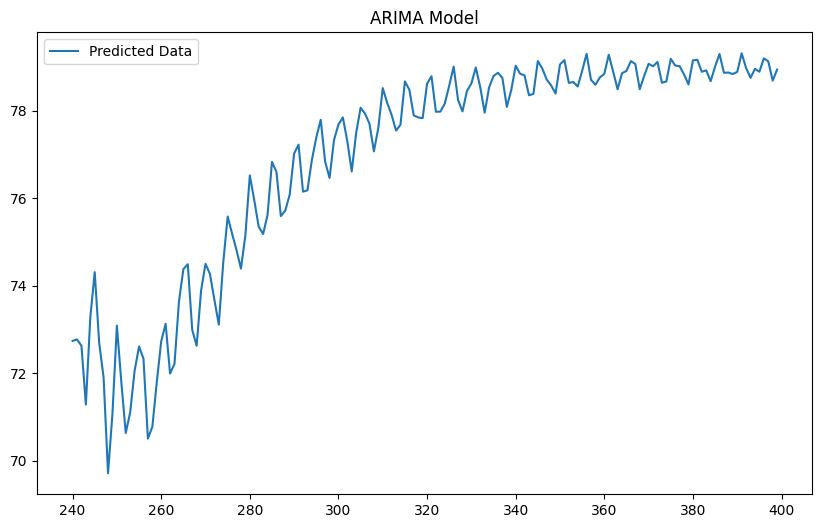

In [12]:
forecast= arima_model_fit.forecast(steps=len(y_test)+100)

# plot

plt.figure(figsize=(10,6))
plt.plot(forecast)

plt.legend(['Predicted Data'], loc='upper left')

plt.title('ARIMA Model')

plt.show()

# SARIMAX

In [35]:
# SARIMAX

from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(y_train, order=(20,0,7), seasonal_order=(1, 0, 1, 52))

sarima_model_fit = sarima_model.fit()



c:\Users\shrey\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:

forecast= sarima_model_fit.forecast(steps=len(y_test))

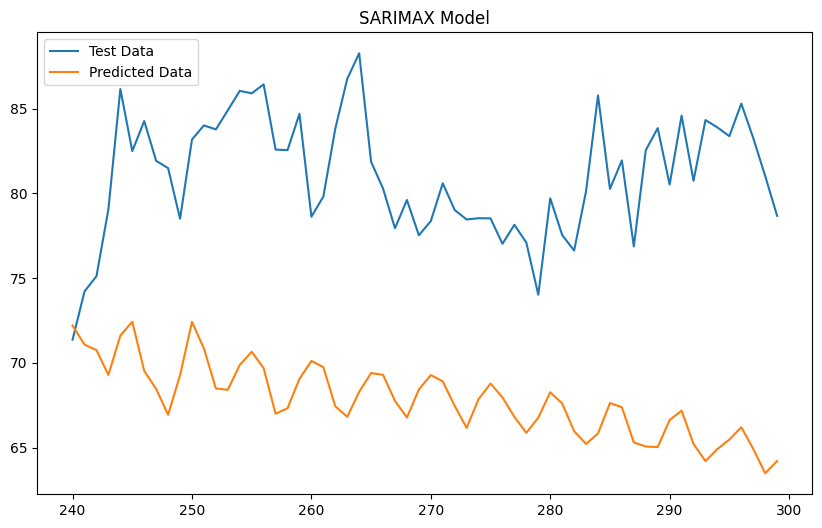

In [37]:
# plot

plt.figure(figsize=(10,6))
plt.plot(y_test)

plt.plot(forecast)

plt.legend(['Test Data','Predicted Data'], loc='upper left')
plt.title('SARIMAX Model')

plt.show()


In [38]:
print(sarima_model_fit.aic)
temporal_metrics(forecast,y_test)

1282.6947696702593
Mean Absolute Error:  13.244940631071604
Mean Squared Error:  192.6904320290285
Root Mean Squared Error:  13.881297923070036
Smape 0.08865783748963543


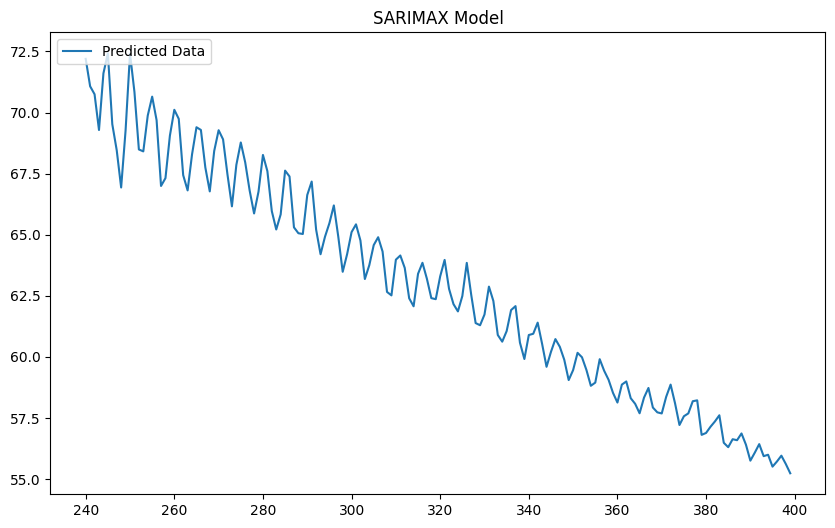

In [39]:
forecast= sarima_model_fit.forecast(steps=len(y_test)+100)

# plot

plt.figure(figsize=(10,6))
plt.plot(forecast)

plt.legend(['Predicted Data'], loc='upper left')

plt.title('SARIMAX Model')

plt.show()

# USING EXOG Values with Non-stationary points

In [40]:
# X and Y

X=data[['Open','Volume']]

Y=data['Close']

# split temporal data

train_size = int(0.8 * len(X))  # Adjust the split ratio as needed

# Split the data into training and testing sets based on the cutoff index
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = Y[:train_size], Y[train_size:]

# print shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(240, 2)
(60, 2)
(240,)
(60,)


# ARIMA

In [41]:
exog = X_train[['Open', 'Volume']]

In [42]:
from statsmodels.tsa.arima.model import ARIMA

# 20,0,15
arima_model = ARIMA(y_train,exog=exog, order=(20,0,7))
# p,d,q
arima_model_fit = arima_model.fit()

c:\Users\shrey\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
test_exog = X_test[['Open','Volume']]
forecast= arima_model_fit.forecast(steps=len(y_test),exog=test_exog)

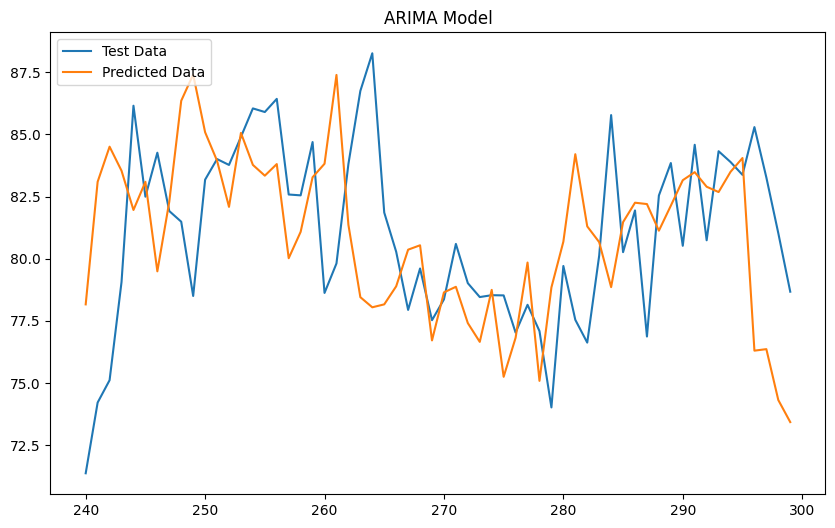

In [44]:
# plot 

plt.figure(figsize=(10,6))
plt.plot(y_test)

plt.plot(forecast)

plt.legend(['Test Data','Predicted Data'], loc='upper left')
plt.title('ARIMA Model')

plt.show()

In [45]:
print(arima_model_fit.aic)
temporal_metrics(forecast,y_test)

1626.9208333107977
Mean Absolute Error:  3.2816758301612015
Mean Squared Error:  18.629182683433626
Root Mean Squared Error:  4.316153690895822
Smape 0.020335382086198717


# SARIMAX

In [46]:
exog = X_train[['Open', 'Volume']]

In [47]:
# SARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(y_train, order=(20,0,7),exog=exog, seasonal_order=(1, 0, 1, 52))

sarima_model_fit = sarima_model.fit()



In [48]:
test_exog = X_test[['Open','Volume']]
forecast= sarima_model_fit.forecast(steps=len(y_test),exog=test_exog)

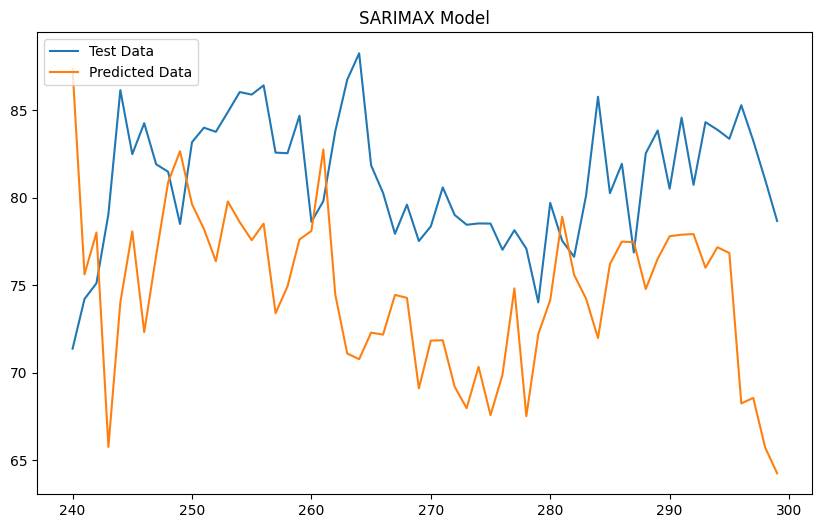

In [49]:
# plot 

plt.figure(figsize=(10,6))
plt.plot(y_test)

plt.plot(forecast)

plt.legend(['Test Data','Predicted Data'], loc='upper left')
plt.title('SARIMAX Model')

plt.show()

In [50]:
print(sarima_model_fit.aic)
temporal_metrics(forecast,y_test)

2222.114040028222
Mean Absolute Error:  7.437526217403382
Mean Squared Error:  74.49297527383513
Root Mean Squared Error:  8.630931309762298
Smape 0.04808446694400046
